<a href="https://colab.research.google.com/github/bbchen33/Machine-Learning/blob/master/SGD_classifier_of_large_scale_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=50000, n_classes=2, weights=[1,1], random_state=1)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
from sklearn.linear_model import SGDClassifier

Using SGD partial fit to train with the entire training set for 100 times

In [0]:
score = []
for i in range(100):
  clf_SGD.partial_fit(X_train, y_train, classes = np.array([0,1]))
  score.append(clf_SGD.score(X_test,y_test))

Text(0, 0.5, 'test set accuracy')

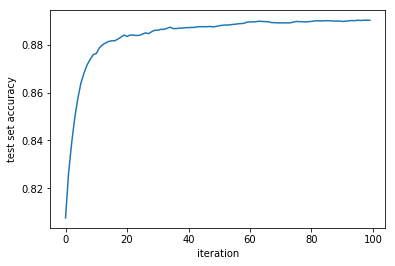

In [87]:
import matplotlib.pyplot as plt
plt.plot(range(100), score)
plt.xlabel('iteration')
plt.ylabel('test set accuracy')

In [92]:
print(f'The highest score is: {max(score)}')

The highest score is: 0.8903


The accuracy score on the test set increases as the iteration increases

In [0]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=100,
                        random_state=1).split(X_train, y_train)
SGD = SGDClassifier(loss='log', random_state=1)
K_fold_score = []
for k, (train,test) in enumerate(kfold):
  SGD.partial_fit(X[train], y[train],classes = np.array([0,1]))
  K_fold_score.append(SGD.score(X_test, y_test)) 


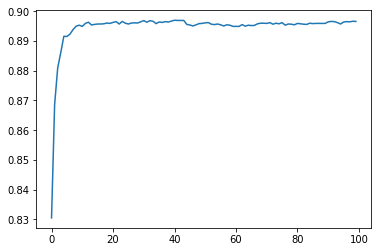

In [89]:
plt.plot(range(100), K_fold_score)

In [93]:
print(f'The highest score is: {max(K_fold_score)}')

The highest score is: 0.897


Splitting the train set into k fold actually results in rapid increase in the accuracy of the test set.